In [1]:
%matplotlib inline
import math
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import defaultdict
from scipy.stats import pearsonr
import pandas as pd
from IPython.display import display


In [ ]:
#%pip install matplotlib-venn

In [2]:
DATA_DIR = r"Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data"

DATASETS = {
    "heart_diagnoses_1": "heart_diagnoses_1.csv",
    "laboratory_events_codes_2": "laboratory_events_codes_2.csv",
    "microbiology_events_codes_3": "microbiology_events_codes_3.csv",
    "procedure_code_4": "procedure_code_4.csv",
}
name = "procedure_code_4"

In [3]:
df = pd.read_csv(f"{DATA_DIR}/{DATASETS[name]}", index_col=False)

df.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'chartdate', 'icd_code',
       'long_title'],
      dtype='object')

# INspections

## A

In [4]:
df.head(10)

,subject_id,hadm_id,seq_num,chartdate,icd_code,long_title
0,10000980,26913865,1,2189-07-01 03:00:00,0066,Percutaneous transluminal coronary angioplasty...
1,10000980,26913865,2,2189-07-01 03:00:00,3607,Insertion of drug-eluting coronary artery sten...
2,10000980,26913865,3,2189-07-01 03:00:00,0045,Insertion of one vascular stent
3,10000980,26913865,4,2189-07-01 03:00:00,0041,Procedure on two vessels
4,10000980,26913865,5,2189-07-01 03:00:00,3722,Left heart cardiac catheterization
5,10000980,26913865,6,2189-07-01 03:00:00,8856,Coronary arteriography using two catheters
6,10000980,26913865,7,2189-07-01 03:00:00,0044,Procedure on vessel bifurcation
7,10002013,24760295,1,2160-07-12 03:00:00,3722,Left heart cardiac catheterization
8,10002013,24760295,2,2160-07-12 03:00:00,8856,Coronary arteriography using two catheters
9,10002155,23822395,1,2129-08-05 03:00:00,0066,Percutaneous transluminal coronary angioplasty...


In [5]:
df.tail(10)

,subject_id,hadm_id,seq_num,chartdate,icd_code,long_title
14487,19997293,28847872,3,2123-12-30 03:00:00,9671,Continuous invasive mechanical ventilation for...
14488,19997293,28847872,4,2123-12-30 03:00:00,3778,Insertion of temporary transvenous pacemaker s...
14489,19997293,28847872,5,2124-01-03 03:00:00,8628,"Nonexcisional debridement of wound, infection ..."
14490,19997293,28847872,6,2124-01-01 03:00:00,3897,Central venous catheter placement with guidance
14491,19997367,24169669,1,2128-02-26 03:00:00,3723,Combined right and left heart cardiac catheter...
14492,19998497,21557581,1,2145-07-29 03:00:00,0066,Percutaneous transluminal coronary angioplasty...
14493,19998497,21557581,2,2145-07-29 03:00:00,3607,Insertion of drug-eluting coronary artery sten...
14494,19998497,21557581,3,2145-07-29 03:00:00,0045,Insertion of one vascular stent
14495,19998497,21557581,4,2145-07-29 03:00:00,0040,Procedure on single vessel
14496,19998497,21557581,5,2145-07-29 03:00:00,8856,Coronary arteriography using two catheters


## B

In [6]:
df["icd_code"].value_counts(dropna=False) 

icd_code
8856       1603
0066       1020
3722        975
0040        848
3607        685
           ... 
3814          1
0CQ5XZZ       1
047H3DZ       1
0B9P30Z       1
0DH63UZ       1
Name: count, Length: 633, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  14497 non-null  int64 
 1   hadm_id     14497 non-null  int64 
 2   seq_num     14497 non-null  int64 
 3   chartdate   14497 non-null  object
 4   icd_code    14497 non-null  object
 5   long_title  14497 non-null  object
dtypes: int64(3), object(3)
memory usage: 679.7+ KB


yay no none

# Data Understanding and Preprocessing, cleaning 

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#show duplicated rows
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)

,subject_id,hadm_id,seq_num,chartdate,icd_code,long_title


In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  14497 non-null  int64 
 1   hadm_id     14497 non-null  int64 
 2   seq_num     14497 non-null  int64 
 3   chartdate   14497 non-null  object
 4   icd_code    14497 non-null  object
 5   long_title  14497 non-null  object
dtypes: int64(3), object(3)
memory usage: 679.7+ KB


In [12]:
for col in df.columns:
    if col == 'charttime' or col == 'hadm_id' or col == 'subject_id' or col == 'chartdate':
        continue
    print(f"{col}: {df[col].value_counts().tail(30)}")

seq_num: seq_num
1     3459
2     2862
3     2141
4     1676
5     1390
6     1095
7      694
8      395
9      221
10     153
11     110
12      83
13      54
14      38
15      27
16      24
17      17
18      13
19      12
20       9
21       8
22       5
23       4
24       3
25       1
26       1
27       1
28       1
Name: count, dtype: int64
icd_code: icd_code
0W9D3ZZ    1
8674       1
0WCD0ZZ    1
5A1522F    1
02703EZ    1
03743D6    1
3729       1
3869       1
9952       1
02580ZZ    1
02L74CK    1
5A15223    1
0B978ZZ    1
0DH58DZ    1
0KCH0ZZ    1
3E1F88Z    1
0JH63XZ    1
5A09357    1
7902       1
7903       1
543        1
7747       1
7867       1
02703Z6    1
0060       1
3814       1
0CQ5XZZ    1
047H3DZ    1
0B9P30Z    1
0DH63UZ    1
Name: count, dtype: int64
long_title: long_title
Drainage of Pericardial Cavity, Percutaneous Approach                                                            1
Attachment of pedicle or flap graft to other sites                          

## Check for wrong NaNs / non typical entries in each column

#### Find wrong NaNs

In [17]:
# find any one or two character or ___ etc in icd_code 
# Find suspicious/invalid icd_code entries (short codes, underscores, special chars)
print("="*60)
print("CHECKING icd_code FOR INVALID ENTRIES")
print("="*60)

# 1. Very short codes (1-2 characters)
short_codes = df[df['icd_code'].str.len() <= 2]
print(f"\nCodes with 1-2 characters: {len(short_codes)}")
if len(short_codes) > 0:
    print(short_codes['icd_code'].value_counts())

# 2. Codes containing underscores or special patterns
underscore_codes = df[df['icd_code'].str.contains(r'_+', na=False)]
print(f"\nCodes with underscores: {len(underscore_codes)}")
if len(underscore_codes) > 0:
    print(underscore_codes['icd_code'].value_counts())

# 3. Non-alphanumeric codes (excluding valid ICD separators like '.')
invalid_pattern = df[df['icd_code'].str.contains(r'[^A-Za-z0-9\.]', na=False)]
print(f"\nCodes with special characters: {len(invalid_pattern)}")
if len(invalid_pattern) > 0:
    print(invalid_pattern['icd_code'].value_counts().head(20))

# 4. Empty or whitespace-only
empty_codes = df[df['icd_code'].str.strip() == '']
print(f"\nEmpty/whitespace codes: {len(empty_codes)}")

# 5. Summary of code length distribution
print(f"\n{'='*60}")
print("ICD_CODE LENGTH DISTRIBUTION")
print("="*60)
print(df['icd_code'].str.len().value_counts().sort_index())

CHECKING icd_code FOR INVALID ENTRIES

Codes with 1-2 characters: 0

Codes with underscores: 0

Codes with special characters: 0

Empty/whitespace codes: 0

ICD_CODE LENGTH DISTRIBUTION
icd_code
3      116
4    11668
7     2713
Name: count, dtype: int64


 ## Convert datetimes

In [15]:
cols = ['chartdate']  

for col in cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"{col}: parsed {df[col].notna().sum()} values, {df[col].isna().sum()} NaT")

display(df[[c for c in df.columns if c in cols]])

chartdate: parsed 14497 values, 0 NaT


,chartdate
0,2189-07-01 03:00:00
1,2189-07-01 03:00:00
2,2189-07-01 03:00:00
3,2189-07-01 03:00:00
4,2189-07-01 03:00:00
...,...
14492,2145-07-29 03:00:00
14493,2145-07-29 03:00:00
14494,2145-07-29 03:00:00
14495,2145-07-29 03:00:00


## Little intermed inspection 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   subject_id  14497 non-null  int64         
 1   hadm_id     14497 non-null  int64         
 2   seq_num     14497 non-null  int64         
 3   chartdate   14497 non-null  datetime64[ns]
 4   icd_code    14497 non-null  object        
 5   long_title  14497 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 679.7+ KB


## Handle missing values

In [18]:
# print sum of all missing values per column
for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count > 0:
        print(f"Column '{col}': {missing_count} missing values")

## Save

In [19]:
df.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}", index=False)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 0 to 15586
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subject_id           15586 non-null  int64         
 1   hadm_id              15586 non-null  int64         
 2   chartdate            15586 non-null  datetime64[ns]
 3   charttime            15586 non-null  datetime64[ns]
 4   spec_type_desc       15586 non-null  object        
 5   test_name            15586 non-null  object        
 6   org_name             5391 non-null   object        
 7   ab_name              4820 non-null   object        
 8   dilution_text        4458 non-null   object        
 9   dilution_comparison  4458 non-null   object        
 10  dilution_value       4458 non-null   float64       
 11  interpretation       4820 non-null   object        
 12  technician_id        15586 non-null  object        
 13  qc_flag              15586 non-null 

## Create features and slim version

In [51]:
df_slim = df.copy()

In [52]:
df_slim.columns

Index(['subject_id', 'hadm_id', 'chartdate', 'charttime', 'spec_type_desc',
       'test_name', 'org_name', 'ab_name', 'dilution_text',
       'dilution_comparison', 'dilution_value', 'interpretation',
       'technician_id', 'qc_flag', 'is_qc_fail', 'is_qc_warn', 'is_qc_ok'],
      dtype='object')

### Create features
- var for exams
- var for charttime?
- var for dod (is_dead?), anchor_year?

### Corr

CORRELATION MATRIX ANALYSIS

Numeric columns found: ['subject_id', 'hadm_id', 'dilution_value', 'is_qc_fail', 'is_qc_warn', 'is_qc_ok']
Total numeric columns: 6

CORRELATION MATRIX
                subject_id  hadm_id  dilution_value  is_qc_fail  is_qc_warn  \
subject_id           1.000   -0.018           0.042      -0.005       0.000   
hadm_id             -0.018    1.000           0.010      -0.010       0.004   
dilution_value       0.042    0.010           1.000         NaN       0.021   
is_qc_fail          -0.005   -0.010             NaN       1.000      -0.077   
is_qc_warn           0.000    0.004           0.021      -0.077       1.000   
is_qc_ok             0.002    0.002          -0.021      -0.544      -0.795   

                is_qc_ok  
subject_id         0.002  
hadm_id            0.002  
dilution_value    -0.021  
is_qc_fail        -0.544  
is_qc_warn        -0.795  
is_qc_ok           1.000  


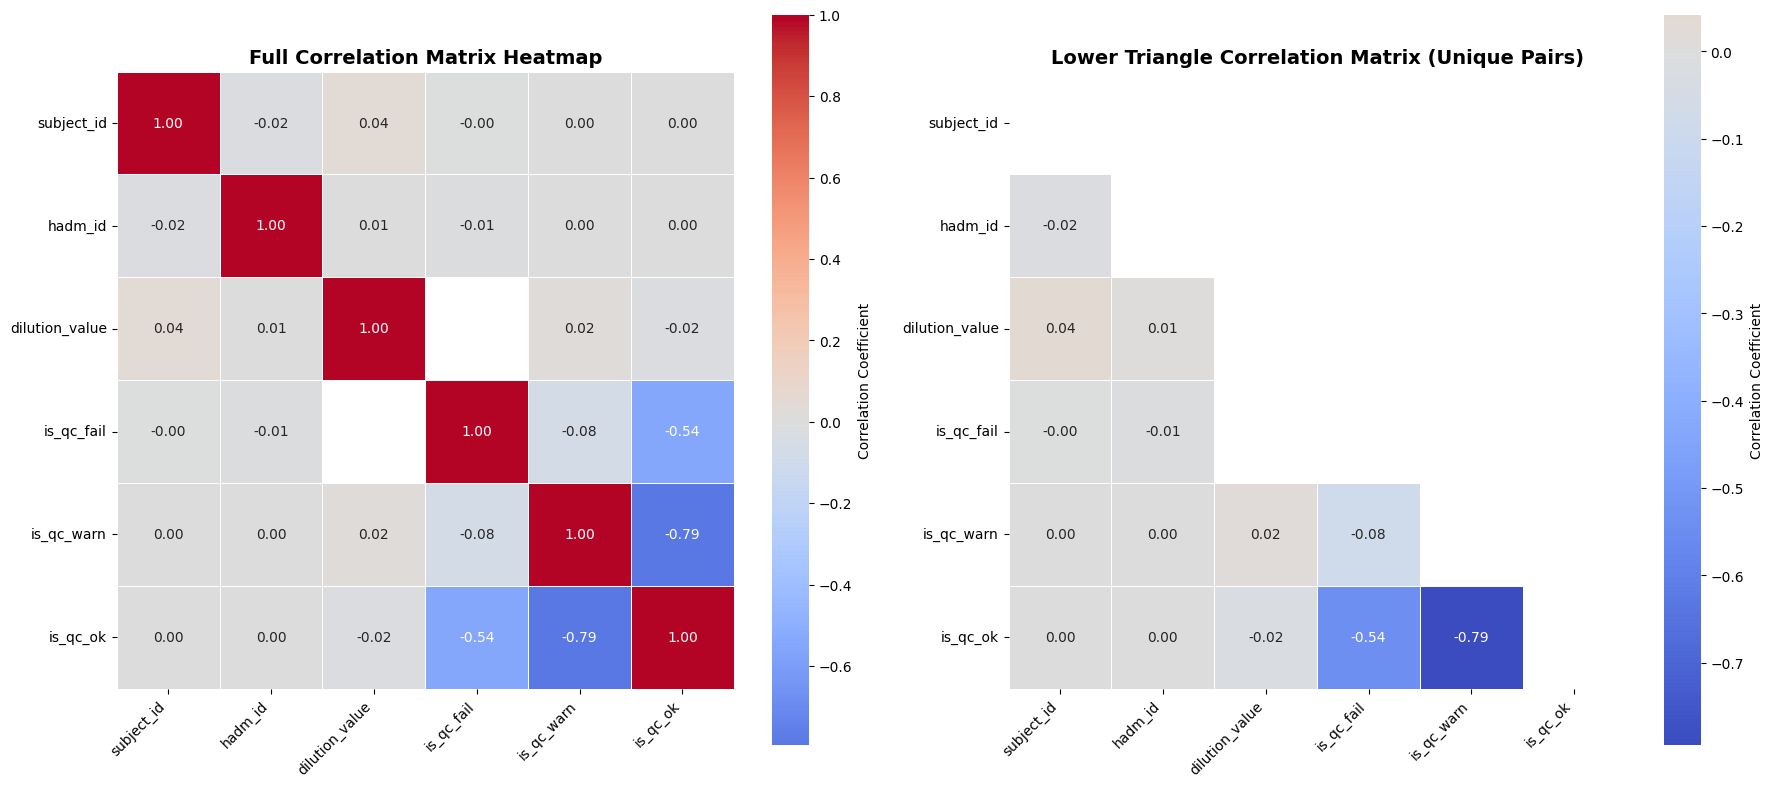


STRONG CORRELATIONS (|r| > 0.5, excluding self-correlations)

Found 2 strong correlations:

Variable 1 Variable 2  Correlation        Strength
is_qc_warn   is_qc_ok    -0.794659 Strong Negative
is_qc_fail   is_qc_ok    -0.544215 Strong Negative

MODERATE CORRELATIONS (0.3 < |r| ≤ 0.5)

No moderate correlations found (0.3 < |r| ≤ 0.5)

SUMMARY STATISTICS

Mean correlation: nan
Median correlation: nan
Std Dev: nan
Min: nan
Max: nan


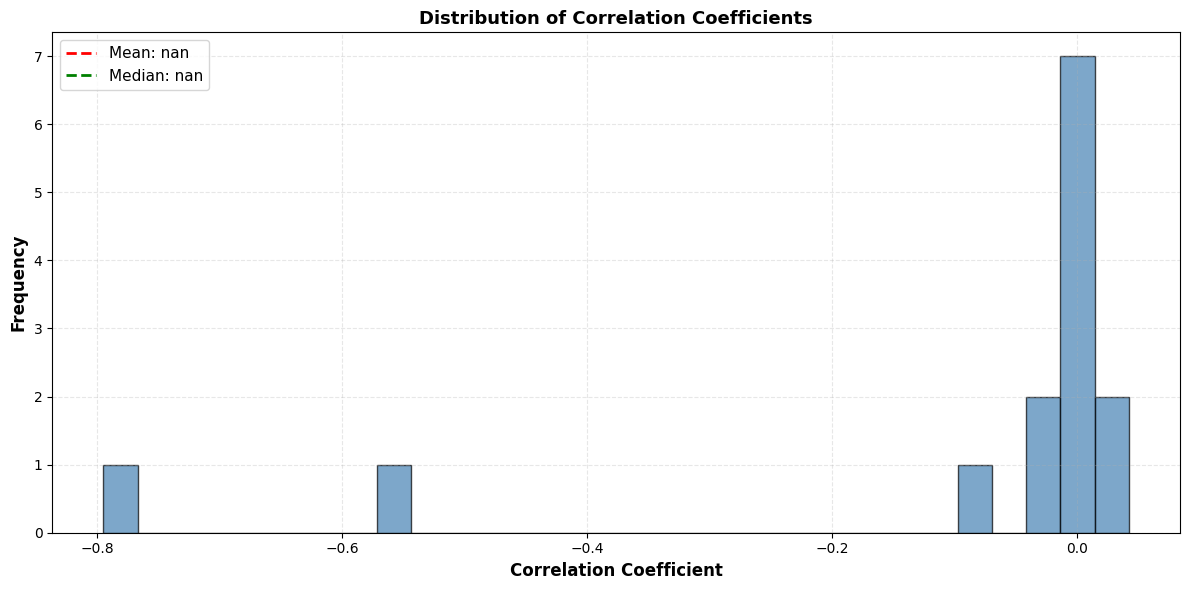

In [53]:
print("="*80)
print("CORRELATION MATRIX ANALYSIS")
print("="*80)

# Select numeric columns only
numeric_cols = df_slim.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns found: {numeric_cols}")
print(f"Total numeric columns: {len(numeric_cols)}\n")

if len(numeric_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df_slim[numeric_cols].corr()
    
    print("="*80)
    print("CORRELATION MATRIX")
    print("="*80)
    print(correlation_matrix.round(3))
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot 1: Full correlation heatmap
    ax1 = axes[0]
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={'label': 'Correlation Coefficient'},
                ax=ax1)
    ax1.set_title('Full Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax1.get_yticklabels(), rotation=0)
    
    # Plot 2: Mask for upper triangle (cleaner view)
    ax2 = axes[1]
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                mask=mask,
                cbar_kws={'label': 'Correlation Coefficient'},
                ax=ax2)
    ax2.set_title('Lower Triangle Correlation Matrix (Unique Pairs)', fontsize=14, fontweight='bold')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax2.get_yticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Extract strong correlations (> 0.5 or < -0.5, excluding diagonal)
    print("\n" + "="*80)
    print("STRONG CORRELATIONS (|r| > 0.5, excluding self-correlations)")
    print("="*80)
    
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                strong_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': corr_value,
                    'Strength': 'Strong Positive' if corr_value > 0 else 'Strong Negative'
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
        print(f"\nFound {len(strong_corr)} strong correlations:\n")
        print(strong_corr_df.to_string(index=False))
    else:
        print("\nNo correlations with |r| > 0.5 found")
    
    # Moderate correlations (0.3 to 0.5)
    print("\n" + "="*80)
    print("MODERATE CORRELATIONS (0.3 < |r| ≤ 0.5)")
    print("="*80)
    
    moderate_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if 0.3 < abs(corr_value) <= 0.5:
                moderate_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': corr_value,
                    'Strength': 'Moderate Positive' if corr_value > 0 else 'Moderate Negative'
                })
    
    if moderate_corr:
        moderate_corr_df = pd.DataFrame(moderate_corr).sort_values('Correlation', key=abs, ascending=False)
        print(f"\nFound {len(moderate_corr)} moderate correlations:\n")
        print(moderate_corr_df.to_string(index=False))
    else:
        print("\nNo moderate correlations found (0.3 < |r| ≤ 0.5)")
    
    # Summary statistics
    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)
    
    # Get correlation values (excluding diagonal)
    corr_values = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_values.append(correlation_matrix.iloc[i, j])
    
    corr_values = np.array(corr_values)
    print(f"\nMean correlation: {corr_values.mean():.3f}")
    print(f"Median correlation: {np.median(corr_values):.3f}")
    print(f"Std Dev: {corr_values.std():.3f}")
    print(f"Min: {corr_values.min():.3f}")
    print(f"Max: {corr_values.max():.3f}")
    
    # Distribution of correlations
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hist(corr_values, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(corr_values.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {corr_values.mean():.3f}')
    ax.axvline(np.median(corr_values), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(corr_values):.3f}')
    ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title('Distribution of Correlation Coefficients', fontsize=13, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig('correlation_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
else:
    print("⚠️ Not enough numeric columns for correlation analysis")
    print(f"Found only {len(numeric_cols)} numeric column(s)")

### Dropunused

In [54]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 0 to 15586
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subject_id           15586 non-null  int64         
 1   hadm_id              15586 non-null  int64         
 2   chartdate            15586 non-null  datetime64[ns]
 3   charttime            15586 non-null  datetime64[ns]
 4   spec_type_desc       15586 non-null  object        
 5   test_name            15586 non-null  object        
 6   org_name             5391 non-null   object        
 7   ab_name              4820 non-null   object        
 8   dilution_text        4458 non-null   object        
 9   dilution_comparison  4458 non-null   object        
 10  dilution_value       4458 non-null   float64       
 11  interpretation       4820 non-null   object        
 12  technician_id        15586 non-null  object        
 13  qc_flag              15586 non-null 

In [55]:
df_slim.columns, len(df_slim.columns)

(Index(['subject_id', 'hadm_id', 'chartdate', 'charttime', 'spec_type_desc',
        'test_name', 'org_name', 'ab_name', 'dilution_text',
        'dilution_comparison', 'dilution_value', 'interpretation',
        'technician_id', 'qc_flag', 'is_qc_fail', 'is_qc_warn', 'is_qc_ok'],
       dtype='object'),
 17)

In [56]:
df_slim.drop(columns=[ 'chartdate', 'dilution_text',  'technician_id', 'is_qc_fail', 'is_qc_warn'], inplace=True)
df_slim.columns, len(df_slim.columns)

(Index(['subject_id', 'hadm_id', 'charttime', 'spec_type_desc', 'test_name',
        'org_name', 'ab_name', 'dilution_comparison', 'dilution_value',
        'interpretation', 'qc_flag', 'is_qc_ok'],
       dtype='object'),
 12)

## Save SLim

In [ ]:
df_slim.to_csv(f"{DATA_DIR}/heart_diagnoses_1_cleaned_slim.csv", index=False)